In [0]:
import pandas as pd 


In [0]:
url="https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv"

df = pd.read_csv(url)

In [12]:
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,0,2,1,0,2,0,2,1,0,1,0,0,0,0,2,2,0,0,0,0,4,1,1,1,1,1,1,2,0,2,2,1,2,3,0,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,2,2,2,3,2,3,3,3,3,2,3,3,3,3,2,3,3,2,2,2,1,2,2,1,1,2,3,2,2,3,3,3,3,4,3,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,4,3,2,3,4,3,2,3,2,1,2,1,1,2,3,3,2,2,2,3,1,1,0,2,2,1,4,4,4,4,4,4,3,2,0,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,2,3,2,3,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,3,0,0,2,1,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,2,2,1,2,3,2,2,2,0,2,2,2,2,4,3,3,1


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [42]:
X=df[df.columns[0:54]]
X
y=df[df.columns[54:55]]
y

,Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [0]:
clf=tree.DecisionTreeClassifier(max_depth=2)
clf=clf.fit(X_train,y_train)

In [0]:
 from sklearn.metrics import accuracy_score

In [56]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705882352941176

[Text(200.88000000000002, 181.2, 'X[17] <= 1.5\ngini = 0.499\nsamples = 136\nvalue = [71, 65]'),
 Text(133.92000000000002, 108.72, 'X[25] <= 1.5\ngini = 0.053\nsamples = 73\nvalue = [71, 2]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 63\nvalue = [0, 63]')]

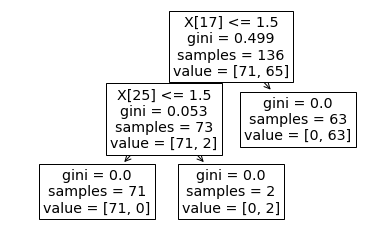

In [57]:
tree.plot_tree(clf.fit(X_train,y_train))

In [0]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [61]:
 pip install graphviz

In [62]:
pip install pydotplus


In [64]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])


0

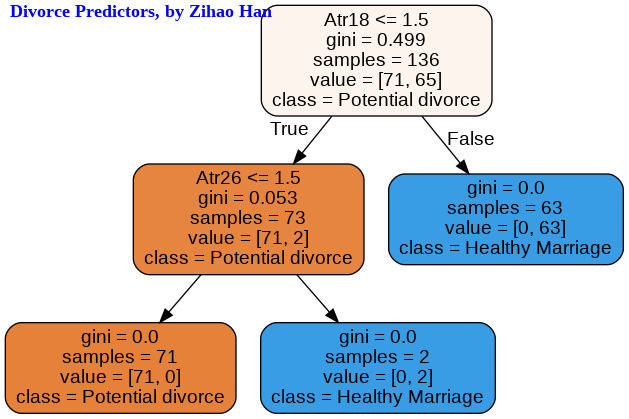

In [68]:
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 18)
draw.text((10, 0), 
          'Divorce Predictors, by Zihao Han', 
          (0,0,255), # RGB desired color
          font=font) 
img.save('sample-out.png')
PImage("sample-out.png")
